<H1>Compare images</H1>

<h3> Import required libraries</h3>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

<h3>Set the location of images.</h3>

In [2]:
image1 = "C:\\Users\\thodo\\Downloads\\archive\\chest_xray\\chest_xray\\train\\PNEUMONIA\\person114_virus_217.jpeg"
image2 = "C:\\Users\\thodo\\Downloads\\archive\\chest_xray\\chest_xray\\train\\PNEUMONIA\\person115_virus_218.jpeg"

<h3>Read images and resize them</h3>

In [3]:
img1 = cv2.imread(image1)
img1 = cv2.resize(img1, (500, 250))
img2 = cv2.imread(image2)
img2 = cv2.resize(img2, (500, 250))

<h3>Compare KAZE keypoints</h3>
<p>Function gets as parameters img1, img2 and computes for each image the keypoints and compares them.</p>

In [4]:
def CompareImagesWithKAZE(img1, img2):
    kaze = cv2.KAZE_create()
    keypoints1, descriptors1 = kaze.detectAndCompute(img1, None)
    keypoints2, descriptors2 = kaze.detectAndCompute(img2, None)
    matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_BRUTEFORCE)
    matches = matcher.match(descriptors1, descriptors2)
    # -- Draw matches
    img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1] + img2.shape[1], 3), dtype=np.uint8)
    cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, img_matches)
    # -- Show detected matches
    plt.imshow(img_matches)

<h3>Compare KAZE keypoints using Flann matcher.</h3>
<p>Function gets as parameters img1, img2 and computes for each image the keypoints and compares them usin Flann matcher.</p>

In [5]:
def CompareImagesWithKAZEUsingFlannMatcher(img1, img2):
    kaze = cv2.KAZE_create()
    keypoints1, descriptors1 = kaze.detectAndCompute(img1, None)
    keypoints2, descriptors2 = kaze.detectAndCompute(img2, None)

    matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
    knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)
    # -- Filter matches using the Lowe's ratio test
    ratio_thresh = 0.8
    good_matches = []
    for m, n in knn_matches:
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)
    # -- Draw matches
    img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1] + img2.shape[1], 3), dtype=np.uint8)
    cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, img_matches,
                   flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    # -- Show detected matches
    cv2.imshow('Matches with Kaze using flann matcher', img_matches)
    plt.imshow(img_matches)
    print('*******************************')
    print('# Keypoints 1:                        \t', len(keypoints1))
    print('# Keypoints 2:                        \t', len(keypoints2))
    print('# Matches:                            \t', len(good_matches))

<h3> Example of comparison </h3>

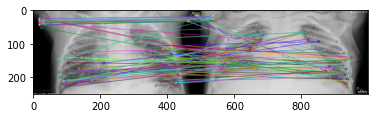

In [6]:
CompareImagesWithKAZE(img1, img2)

*******************************
# Keypoints 1:                        	 116
# Keypoints 2:                        	 135
# Matches:                            	 14


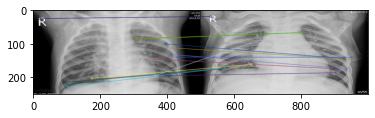

In [30]:
CompareImagesWithKAZEUsingFlannMatcher(img1, img2)

<h3> Example of HOG </h3>

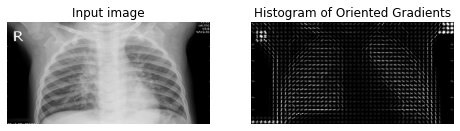

In [8]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

fd, hog_image = hog(img1, orientations=8, pixels_per_cell=(10, 10),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(img1, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()